# Chap08. Autoencoder


In [7]:
# 대표적인 비지도(Unsupervised) 학습 방법인 Autoencoder를 구현
%matplotlib inline
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('../data/mnist/data/', one_hot=True)

Extracting ../data/mnist/data/train-images-idx3-ubyte.gz
Extracting ../data/mnist/data/train-labels-idx1-ubyte.gz
Extracting ../data/mnist/data/t10k-images-idx3-ubyte.gz
Extracting ../data/mnist/data/t10k-labels-idx1-ubyte.gz


In [2]:
#######
# 0. 옵션 설정
#######

# 1) hyper parameters
learning_rate = 0.01
training_epoch = 20 # 전체 데이터를 학습할 총 횟수
batch_size = 100 # Mini-batch 사이즈

# 2) neural layer 구성 옵션
n_hidden = 256 # hidden layer의 뉴런 갯수
n_input = 28*28 # input의 크기 - 이미지 픽셀 수

In [3]:
#######
# 1. Autoencoder 구성
#######
# Autoencoder는 NN의 Unsupervised Learning 이므로
# label에 해당하는 Y가 없고, 입력값 X를 Y로 사용함
X = tf.placeholder(tf.float32, [None, n_input]) # [batch_size, 784]

# Encoder layer와 Decoder layer의 가중치(W)와 편향(b) 변수를 설정
# Input -> Encoder -> Decoder -> output 을 구성하기 위한 값들임
# Autoencoder에서는 hidden layer의 노드 수는 입력(input)값의 노드 수 보다 작음
# -> 입력값(Input)을 압축하고 노이즈를 제거하면서 입력값의 특징을 찾아내게 됨

W_encode = tf.get_variable(name='W_encode', shape=[n_input, n_hidden], # (784, 256) 
                           initializer=tf.contrib.layers.xavier_initializer()) 
b_encode = tf.get_variable(name='b_encode', shape=[n_hidden], # (256, )
                           initializer=tf.contrib.layers.xavier_initializer())

# sigmoid 함수를 이용해 NN layer를 구성함
# Encoder layer 구성
encoder = tf.nn.sigmoid(tf.add(tf.matmul(X, W_encode), b_encode))

In [4]:
# encoder의 output 크기를 입력값(784) 보다 작은 크기(256)로 만들어 정보를 압축하여 특성을 뽑아내고,
# decoder의 출력을 입력값(784)과 동일한 크기를 갖도록하여 입력과 똑같은 Output을 만들어 내도록 함
# Hidden layer의 구성과 특성치를 뽑아내는 알고리즘을 변경하여 다양한 Autoencoer를 만들 수 있음

W_decode = tf.get_variable(name='W_decode', shape=[n_hidden, n_input], # (256, 784) 
                           initializer=tf.contrib.layers.xavier_initializer())
b_decode = tf.get_variable(name='b_decode', shape=[n_input], # (784, )
                           initializer=tf.contrib.layers.xavier_initializer())

decoder = tf.nn.sigmoid(tf.add(tf.matmul(encoder, W_decode), b_decode))

# Decoder는 입력값(원래 이미지)와 최대한 같은 결과를 내야 하므로, Decoding한 결과를 평가하기 위해
# 입력값인 X 값과 decoder와의 차이를 손실값으로 설정
cost = tf.losses.mean_squared_error(labels=X, predictions=decoder)
optimizer = tf.train.RMSPropOptimizer(learning_rate).minimize(cost)

In [14]:
######
# 2. Autoencoder 모델 학습
######
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

total_batch = int(mnist.train.num_examples / batch_size)

for epoch in range(training_epoch):
    total_cost = 0
    
    for i in range(total_batch):
        batch_xs, _ = mnist.train.next_batch(batch_size)
        _, cost_val = sess.run([optimizer, cost], feed_dict={X: batch_xs})
        
        total_cost += cost_val
        
    print('Epoch:', '%04d' % (epoch + 1),
          'Avg. cost = {:.4f}'.format(total_cost / total_batch))
    
print("최적화 완료!")

Epoch: 0001 Avg. cost = 0.0678
Epoch: 0002 Avg. cost = 0.0092
Epoch: 0003 Avg. cost = 0.0065
Epoch: 0004 Avg. cost = 0.0054
Epoch: 0005 Avg. cost = 0.0048
Epoch: 0006 Avg. cost = 0.0044
Epoch: 0007 Avg. cost = 0.0041
Epoch: 0008 Avg. cost = 0.0039
Epoch: 0009 Avg. cost = 0.0037
Epoch: 0010 Avg. cost = 0.0036
Epoch: 0011 Avg. cost = 0.0035
Epoch: 0012 Avg. cost = 0.0034
Epoch: 0013 Avg. cost = 0.0033
Epoch: 0014 Avg. cost = 0.0032
Epoch: 0015 Avg. cost = 0.0031
Epoch: 0016 Avg. cost = 0.0031
Epoch: 0017 Avg. cost = 0.0030
Epoch: 0018 Avg. cost = 0.0030
Epoch: 0019 Avg. cost = 0.0029
Epoch: 0020 Avg. cost = 0.0029
최적화 완료!


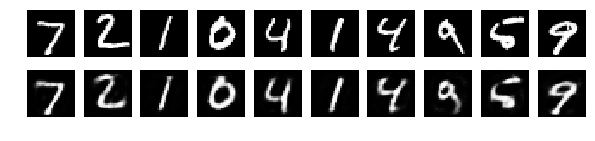

In [13]:
#######
# 3. 결과 확인
# 입력값(위), Autoencoder가 생성한 값(아래)을 시각화를 통해 비교
#######

sample_size = 10

samples = sess.run(decoder, feed_dict={X: mnist.test.images[:sample_size]})

fig, ax = plt.subplots(2, sample_size, figsize=(sample_size, 2))

for i in range(sample_size):
    ax[0][i].set_axis_off()
    ax[1][i].set_axis_off()
    ax[0][i].imshow(np.reshape(mnist.test.images[i], (28, 28)), cmap='Greys_r')
    ax[1][i].imshow(np.reshape(samples[i], (28, 28)), cmap='Greys_r')